In [2]:
import sys
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
from scipy import signal
import pyedflib
from pyedflib import highlevel
from datetime import datetime

In [3]:
#Constants 
filePath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\files\S001\S001R01.edf"
outPath = r"C:\Users\Humperdink2\Documents\github\NAThacks\Data\imgs"
channels = ["C3..", "C4..","CZ..","F4.."]
labels = ["rightHand", "leftHand", "bothHands", "bothFeet", "rest"]
frequency = 160
time_period = 640

In [20]:
#reading EDF file and extracting 
annotations = ""
file = ""

file = pyedflib.EdfReader(filePath)  
annotations = file.readAnnotations()
file.close()

signals, signal_headers, header = highlevel.read_edf(filePath, ch_names=channels)
                                                            
signals.shape

AttributeError: 'dict' object has no attribute 'shape'

In [5]:
print(annotations)


(array([0.]), array([60.2]), array(['T0'], dtype='<U2'))


In [10]:
?plt.pcolormesh


Signature:
plt.pcolormesh(
    *args: 'ArrayLike',
    alpha: 'float | None' = None,
    norm: 'str | Normalize | None' = None,
    cmap: 'str | Colormap | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    shading: "Literal['flat', 'nearest', 'gouraud', 'auto'] | None" = None,
    antialiased: 'bool' = False,
    data=None,
    **kwargs,
) -> 'QuadMesh'
Docstring:
Create a pseudocolor plot with a non-regular rectangular grid.

Call signature::

    pcolormesh([X, Y,] C, **kwargs)

*X* and *Y* can be used to specify the corners of the quadrilaterals.

.. hint::

   `~.Axes.pcolormesh` is similar to `~.Axes.pcolor`. It is much faster
   and preferred in most cases. For a detailed discussion on the
   differences see :ref:`Differences between pcolor() and pcolormesh()
   <differences-pcolor-pcolormesh>`.

Parameters
----------
C : array-like
    The mesh data. Supported array shapes are:

    - (M, N) or M*N: a mesh with scalar data. The values are mapped

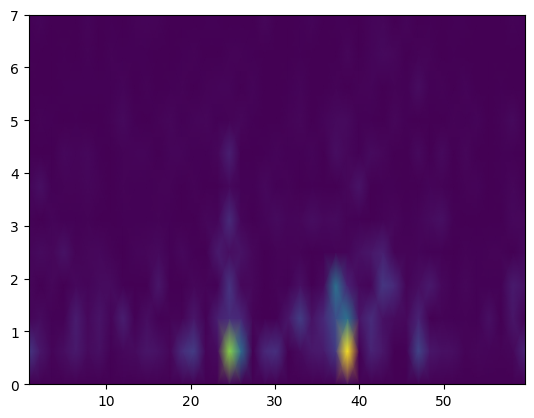

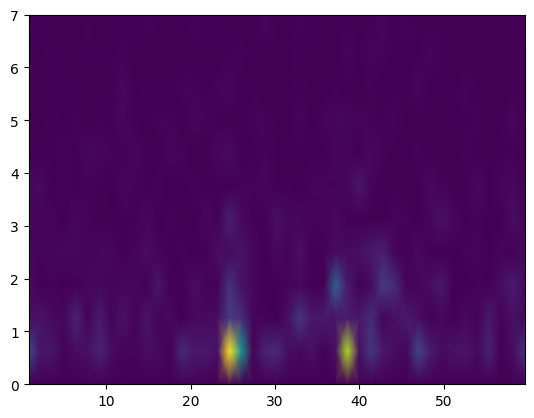

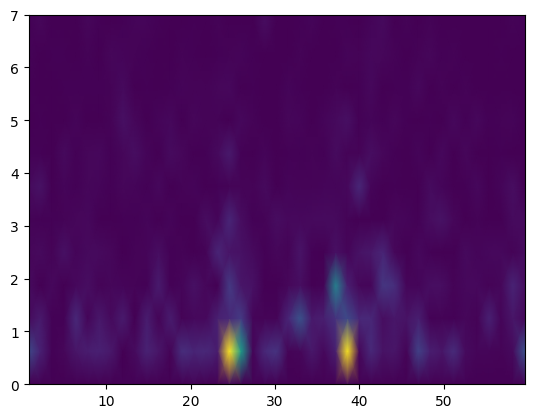

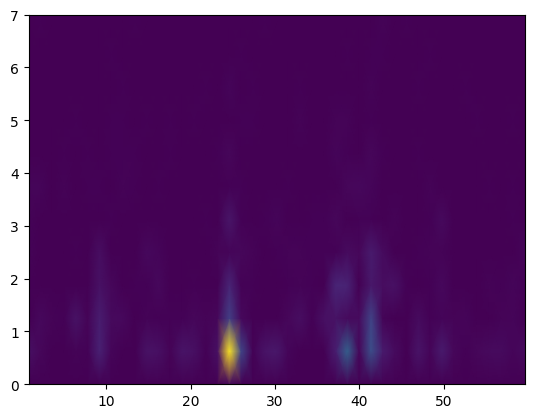

In [42]:
#Generating spectogram
f, t, image = signal.spectrogram(signals,frequency)
# plt.plot(signals)
image =np.transpose(image,(1,2,0))

for count in range(4):
    plt.pcolormesh(t, f, image[:,:,count], shading='gouraud')
    plt.ylim(0,7)
    plt.show()
    



In [13]:
print(f"shape f:{f.shape}, shape t:{t.shape}, shape image:{image.shape}")

shape f:(129,), shape t:(43,), shape image:(43, 129, 64)
